In [6]:
import pandas as pd

In [7]:
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv('C:\\Users\\dell\\Downloads\\UDEMY_TSA_FINAL\\UDEMY_TSA_FINAL\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)

In [9]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [12]:
train_data=df.iloc[:109]
test_data=df.iloc[108:]

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [15]:
test_predictions=fitted_model.forecast(36)

In [16]:
test_predictions

1958-02-01    339.146252
1958-03-01    399.284474
1958-04-01    394.235196
1958-05-01    402.545303
1958-06-01    473.128007
1958-07-01    521.796520
1958-08-01    514.516182
1958-09-01    446.221344
1958-10-01    385.435189
1958-11-01    339.648129
1958-12-01    381.458569
1959-01-01    401.212425
1959-02-01    387.161260
1959-03-01    455.813618
1959-04-01    450.049483
1959-05-01    459.536102
1959-06-01    540.111631
1959-07-01    595.670443
1959-08-01    587.359382
1959-09-01    509.395627
1959-10-01    440.003604
1959-11-01    387.734191
1959-12-01    435.463990
1960-01-01    458.014521
1960-02-01    441.974046
1960-03-01    520.345937
1960-04-01    513.765738
1960-05-01    524.595436
1960-06-01    616.578535
1960-07-01    680.003148
1960-08-01    670.515440
1960-09-01    581.513880
1960-10-01    502.297604
1960-11-01    442.628090
1960-12-01    497.115288
1961-01-01    522.858436
Freq: MS, dtype: float64

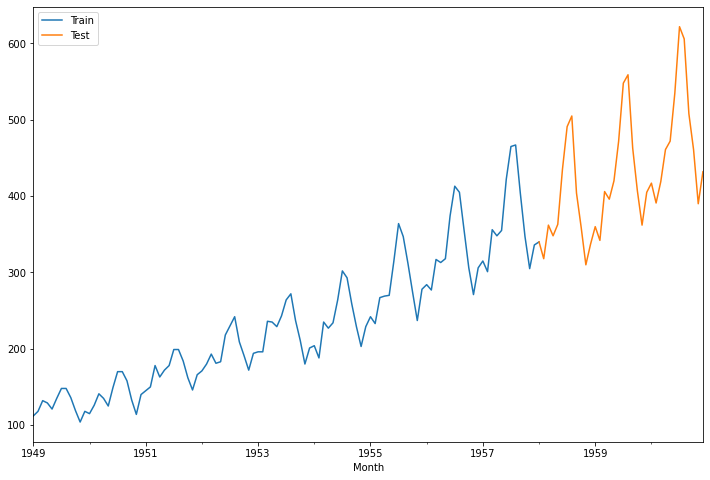

In [17]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')

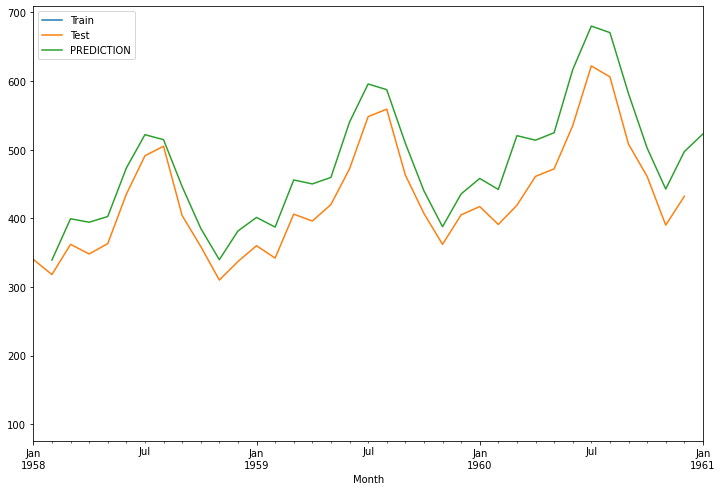

In [18]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

#HOW TO EVALUATE PREDICTION ANALYTICALLY
#MOST COMMON EVALUATION METRICS FOR REGRESSION
1.MEAN ABSOLUTE ERROR
2.MEAN SQAURED ERROR
3.RMS ERROR


In [5]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
mean_squared_error(test_data,test_predictions)

5614.103650709311

In [20]:
mean_absolute_error(test_data,test_predictions)

63.030144414397256

In [21]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [23]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92732245789456

In [25]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [26]:
forecast_predictions=final_model.forecast(36)

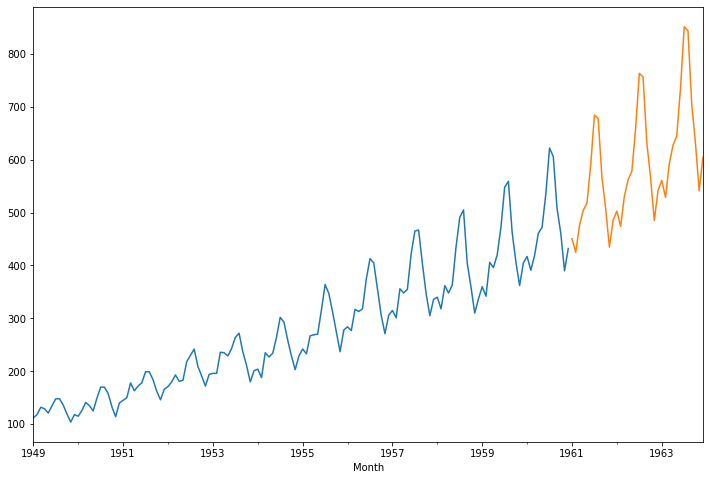

In [28]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [29]:
df.tail()#graph above has predicted 36 months ahead 

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [30]:
'''differencing is there which can convert non stationary to
stationary data set in which ARIMA MODEL CAN BE APPLIED'''

'differencing is there which can convert non stationary to\nstationary data set in which ARIMA MODEL CAN BE APPLIED'